# Data Loading,Data Preprocessing and Cleaning


In [23]:
import kagglehub


path = kagglehub.dataset_download("amjadzhour/car-price-prediction")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/car-price-prediction


In [24]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/amjadzhour/car-price-prediction/versions/1/Car_Price_Prediction.csv")
print(df.head())

    Make    Model  Year  Engine Size  Mileage Fuel Type Transmission  \
0  Honda  Model B  2015          3.9    74176    Petrol       Manual   
1   Ford  Model C  2014          1.7    94799  Electric    Automatic   
2    BMW  Model B  2006          4.1    98385  Electric       Manual   
3  Honda  Model B  2015          2.6    88919  Electric    Automatic   
4  Honda  Model C  2004          3.4   138482    Petrol    Automatic   

          Price  
0  30246.207931  
1  22785.747684  
2  25760.290347  
3  25638.003491  
4  21021.386657  


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   object 
 1   Model         1000 non-null   object 
 2   Year          1000 non-null   int64  
 3   Engine Size   1000 non-null   float64
 4   Mileage       1000 non-null   int64  
 5   Fuel Type     1000 non-null   object 
 6   Transmission  1000 non-null   object 
 7   Price         1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [27]:
print(df['Make'].unique())

['Honda' 'Ford' 'BMW' 'Audi' 'Toyota']


In [28]:
print(df.head())

    Make    Model  Year  Engine Size  Mileage Fuel Type Transmission  \
0  Honda  Model B  2015          3.9    74176    Petrol       Manual   
1   Ford  Model C  2014          1.7    94799  Electric    Automatic   
2    BMW  Model B  2006          4.1    98385  Electric       Manual   
3  Honda  Model B  2015          2.6    88919  Electric    Automatic   
4  Honda  Model C  2004          3.4   138482    Petrol    Automatic   

          Price  
0  30246.207931  
1  22785.747684  
2  25760.290347  
3  25638.003491  
4  21021.386657  


In [29]:

print(df.isnull().sum())
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Make            0
Model           0
Year            0
Engine Size     0
Mileage         0
Fuel Type       0
Transmission    0
Price           0
dtype: int64
Number of duplicate rows: 0


# Exploratory Data Analysis (EDA)

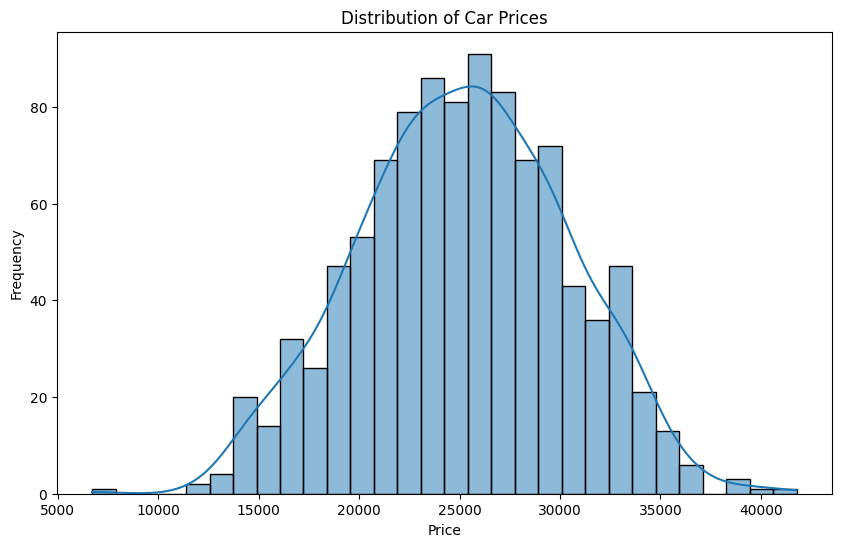

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Data Preparation for Modeling

 Encoding Categorical Features

In [31]:
categorical_cols = df.select_dtypes(include=['object']).columns

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(df_encoded.head())

   Year  Engine Size  Mileage         Price  Make_BMW  Make_Ford  Make_Honda  \
0  2015          3.9    74176  30246.207931     False      False        True   
1  2014          1.7    94799  22785.747684     False       True       False   
2  2006          4.1    98385  25760.290347      True      False       False   
3  2015          2.6    88919  25638.003491     False      False        True   
4  2004          3.4   138482  21021.386657     False      False        True   

   Make_Toyota  Model_Model B  Model_Model C  Model_Model D  Model_Model E  \
0        False           True          False          False          False   
1        False          False           True          False          False   
2        False           True          False          False          False   
3        False           True          False          False          False   
4        False          False           True          False          False   

   Fuel Type_Electric  Fuel Type_Petrol  Transmiss

**Splitting the Data**

In [32]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling Numerical Features

In [33]:
from sklearn.preprocessing import StandardScaler

numerical_cols = X.select_dtypes(include=np.number).columns

scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print(X_train.head())

         Year  Engine Size   Mileage  Make_BMW  Make_Ford  Make_Honda  \
29  -1.582024     0.089052 -1.378616     False      False        True   
535 -0.617375    -0.685311  1.549909     False      False       False   
695  0.186499     0.089052  1.240727     False      False       False   
557 -1.099700    -1.556469 -0.829569      True      False       False   
836  1.472697     0.960210  0.941258     False       True       False   

     Make_Toyota  Model_Model B  Model_Model C  Model_Model D  Model_Model E  \
29         False           True          False          False          False   
535        False          False          False          False           True   
695        False          False           True          False          False   
557        False          False          False           True          False   
836        False          False          False          False           True   

     Fuel Type_Electric  Fuel Type_Petrol  Transmission_Manual  
29             

# ***Model Building and Training***

In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

print("Model training complete!")

Model training complete!


# Model Evaluation

** Making Predictions**

In [35]:
y_pred = model.predict(X_test)

** Calculating R-squared and Adjusted R-squared**

In [36]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2:.4f}")

n = X_test.shape[0]  # Number of samples in the test set
p = X_test.shape[1]  # Number of predictors (features)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Adjusted R-squared Score: {adjusted_r2:.4f}")

R-squared (R2) Score: 0.8171
Adjusted R-squared Score: 0.8033


**Visualizing Predictions**

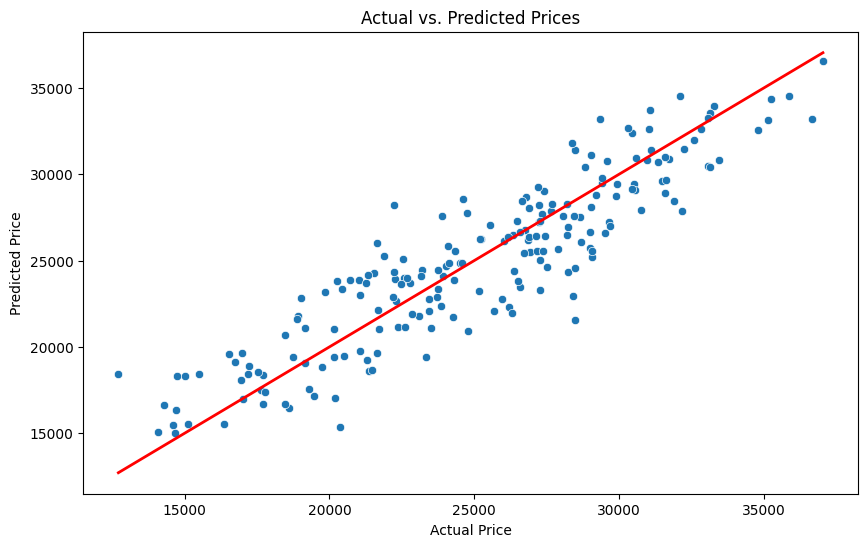

In [37]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()